In [1]:
import pandas as pd
train_df = pd.read_csv('train_set.csv',sep='\t',nrows=100)

In [2]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [3]:
%pylab inline
train_df['text_len'] = train_df['text'].apply(lambda x:len(x.split(' ')))
print(train_df['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

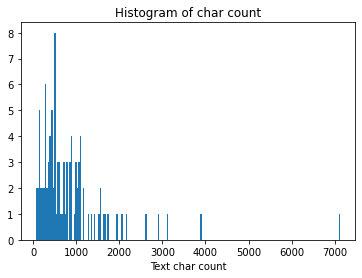

In [4]:
import matplotlib.pyplot as plt
_ = plt.hist(train_df['text_len'],bins=200)
plt.xlabel('Text char count')
plt.title('Histogram of char count')

Text(0.5, 0, 'category')

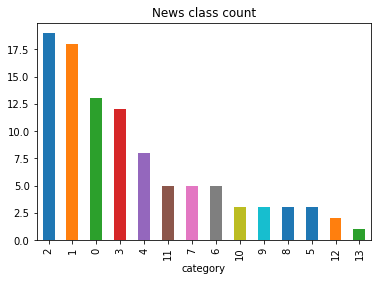

In [5]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('category')

###  字符分布统计

In [6]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(),key=lambda d:d[1],reverse=True)

print(len(word_count))
print(word_count[0])
print(word_count[-1])

2405
('3750', 3702)
('5034', 1)


In [7]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(),key=lambda d:int(d[1]),reverse=True)

print(word_count[0])
print(word_count[1])
print(word_count[2])

('900', 99)
('3750', 99)
('648', 96)


### 结论

    # 1、赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
    # 2、赛题中新闻类别分布不均匀；
    # 3、赛题总共包含7000-8000个字符

### 因此：
    # 每个新闻平均字符个数较多，可能需要截断
    # 类别不均衡会严重影响模型的精度


In [8]:
#作业1：
import re

train_df['seq'] = train_df['text'].apply(lambda x: len(re.split('3750|900|648',x)))
train_df['seq'].describe()

count    100.000000
mean      80.500000
std      107.926509
min        2.000000
25%       28.750000
50%       50.500000
75%       94.000000
max      895.000000
Name: seq, dtype: float64

In [9]:
#作业2：

for i in range(0,14):
    df = train_df[train_df['label']==i]['text']
    punc = ['3750','900','648']
    df_2 = df.apply(lambda x:[i for i in x.split(' ') if i not in punc])
    all_lines = str(df_2.values.tolist()) #将每行line以空格连起来
    word_count = Counter(all_lines.split(" ")) #统计字符和出现次数
    word_count = sorted(word_count.items(),key=lambda d:d[1],reverse=True)
    print(i,word_count[0])

0 ("'6122',", 179)
1 ("'3370',", 211)
2 ("'4704',", 225)
3 ("'2465',", 64)
4 ("'4464',", 40)
5 ("'4939',", 66)
6 ("'2555',", 297)
7 ("'3370',", 134)
8 ("'913',", 33)
9 ("'3370',", 35)
10 ("'2999',", 64)
11 ("'5310',", 27)
12 ("'4464',", 59)
13 ("'3019',", 3)
